In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [17]:
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

In [18]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])

In [19]:
x_train_text = [' '.join([reverse_word_index.get(i - 3, '?') for i in sequence]) for sequence in x_train]
x_test_text = [' '.join([reverse_word_index.get(i - 3, '?') for i in sequence]) for sequence in x_test]

x_train_text = [preprocess_text(text) for text in x_train_text]
x_test_text = [preprocess_text(text) for text in x_test_text]

# Tokenize and pad sequences
maxlen = 200
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train_text)
x_train_seq = tokenizer.texts_to_sequences(x_train_text)
x_test_seq = tokenizer.texts_to_sequences(x_test_text)

x_train = pad_sequences(x_train_seq, maxlen=maxlen)
x_test = pad_sequences(x_test_seq, maxlen=maxlen)

y_train = np.array(y_train)
y_test = np.array(y_test)


In [20]:
n_unique_words = 10000
model = Sequential()
model.add(Embedding(n_unique_words, 64, input_length=maxlen))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 42s 101ms/step - loss: 0.3881 - accuracy: 0.8300 - val_loss: 0.2967 - val_accuracy: 0.8759
Epoch 2/10
391/391 [==============================] - 20s 51ms/step - loss: 0.2241 - accuracy: 0.9201 - val_loss: 0.3139 - val_accuracy: 0.8690
Epoch 3/10
391/391 [==============================] - 14s 36ms/step - loss: 0.1711 - accuracy: 0.9380 - val_loss: 0.3324 - val_accuracy: 0.8678
Epoch 4/10
391/391 [==============================] - 11s 27ms/step - loss: 0.1380 - accuracy: 0.9510 - val_loss: 0.4067 - val_accuracy: 0.8590
Epoch 5/10
391/391 [==============================] - 10s 26ms/step - loss: 0.1105 - accuracy: 0.9620 - val_loss: 0.4000 - val_accuracy: 0.8576
Epoch 6/10
391/391 [==============================] - 9s 24ms/step - loss: 0.0952 - accuracy: 0.9690 - val_loss: 0.5330 - val_accuracy: 0.8584
Epoch 7/10
391/391 [==============================] - 7s 19ms/step - loss: 0.0750 - accuracy: 0.9758 - val_loss: 0.4933 - val_accuracy: 

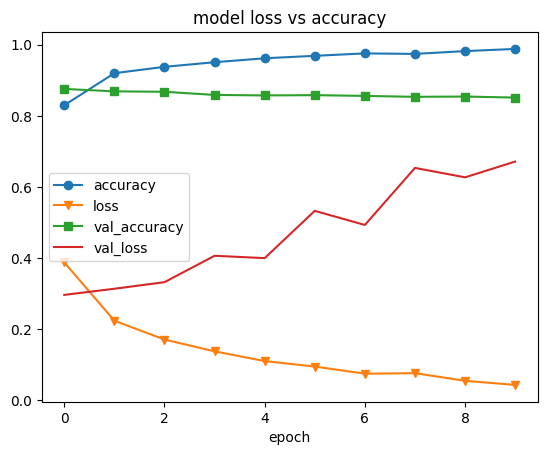

In [21]:
plt.plot(history.history['accuracy'],marker='o')
plt.plot(history.history['loss'],marker='v')
plt.plot(history.history['val_accuracy'],marker='s')
plt.plot(history.history['val_loss'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','loss','val_accuracy','val_loss'])
plt.show()

In [22]:
positive = "Captivating storyline, exceptional acting, and a remarkable cinematic experience"
negative = "Uninspired script, lackluster performances, and a tedious plot made the movie a complete letdown."
def make_prediction(sample_text):
    sample_text = preprocess_text(sample_text)
    tokenized_sample = tokenizer.texts_to_sequences([sample_text])
    padded_sample = pad_sequences(tokenized_sample, maxlen=maxlen)
    prediction = model.predict(padded_sample)
    threshold = 0.5

    # Display the prediction
    if prediction[0][0] > threshold:
        print(f"The text is classified as positive : {prediction[0][0]}")
    else:
        print(f"The text is classified as negative : {1 - prediction[0][0]}")
make_prediction(positive)
make_prediction(negative)

1/1 [==============================] - 0s 336ms/step
The text is classified as positive : 0.9994431138038635
1/1 [==============================] - 0s 20ms/step
The text is classified as negative : 0.9999454161916219
